### Clump Finding Problem
* Imagine you are trying to find *ori* in a newly sequenced genome
* Old frequent hiddent messages won't be useful
* One solution is to use a sliding window and look for a region where a $k$-mer appears several times in short succession
* For example if TGCA forms a (25,3)-clump then it appears at least 3 times in a window of length 25

Even if we solve the clump finding problem, we still have an issue
* Specifically, for the *E. coli* genome we find hundreds of different 9-mers forming (500,3)-clumps
* This makes it absolutely unclear which of these 9-mers might represent a DnaA box in the bacterium’s *ori* region.
* Please read the next sections entitled "The Simplest Way to Replicate DNA" and "Asymmetry of Replication". Dig into the biology, but the abstract model/representation we are using in this class does not require you to understand that biology in detail. Chat with me in Slack about what you find confusing and interesting. 

### Statistics of the Foward and Reverse Half-Strands
The most important consequence for us from the discussion of DNA replication is that we now have four pieces
    1. Forward half-strand x 2
    2. Reverse half-strand x 2

<img src="http://bioinformaticsalgorithms.com/images/Replication/half_strands.png" width=400>



### Why does this matter?
Consider the genome of *Thermotoga petrophila*. If we count the nucleotides in the forward and reverse half strands, then we get the following:

<img src="http://bioinformaticsalgorithms.com/images/Replication/forward_reverse_nucleotide_counts.png" width=400>

Notice that the number of C's and G's is different in the reverse and forward half-strand. Why is this?

Take a minute to read this and then we will discuss together and then we will discuss:

"It turns out that we observe these discrepancies because cytosine (C) has a tendency to mutate into thymine (T) through a process called deamination. Deamination rates rise 100-fold when DNA is single-stranded, which leads to a decrease in cytosine on the forward half-strand. Also, since C-G base pairs eventually change into T-A base pairs, deamination results in the observed decrease in guanine (G) on the reverse half-strand (recall that a forward parent half-strand synthesizes a reverse daughter half-strand, and vice-versa)." - Bioinformatics Algorithms 3rd Edition

### Minimum skew problem
We can use this statistic to find the *ori*.

Our idea is to traverse the genome, keeping a running total of the difference between the counts of G and C. If this difference starts increasing, then we guess we are on the forward half-strand. If this difference starts decreasing, then we guess that we are on the reverse half-strand.


<img src="http://bioinformaticsalgorithms.com/images/Replication/increasing_decreasing_skew.png" width=600>


We define $Skew_i(Genome)$ as the difference between the total number of occurrences of G and the total number of occurrences of C in the first $i$ nucleotides of Genome. 

Note that we can compute $Skew_i(Genome)$ incrementally.  

If the next nucleotide is G, then $Skew_{i+1}(Genome)$ = $Skew_i(Genome)$ + 1

if this nucleotide is C, then $Skew_{i+1}(Genome)$ = $Skew_i(Genome)$ – 1

otherwise, $Skew_{i+1}(Genome)$ = $Skew_i(Genome)$.

**Algorithm:** Compute the skew at every position of a Genome

Input: A DNA string Genome.

Output: An array that computes the $Skew_i(Genome)$. You can assume $Skew_0(Genome)$=0

**Read in the *E coli* genome**

In [1]:
import pandas as pd
data = pd.read_table("http://bioinformaticsalgorithms.com/data/realdatasets/Rearrangements/E_coli.txt",header=None)
genome = data.values[0,0]
genome[:50]

'AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAA'

**The algorithm:**

In [4]:
skews = [0]
for i in range(0,len(genome)):
    if genome[i] == "G":
        skews.append(skews[i]+1)
    elif genome[i] == "C":
        skews.append(skews[i]-1)
    else:
        skews.append(skews[i])
skews[:10]

[0, 0, 1, 0, 0, 0, 0, 0, -1, -1]

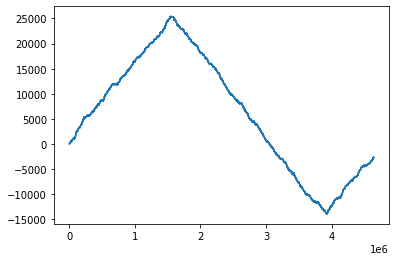

In [5]:
%matplotlib inline
pd.Series(skews).plot.line();

Where do you think the *ori* is located?

In [14]:
print('Position:',skews.idxmin()+1)

Position: 3923621


### What if we applied the same algorithm to the first 2,000 bp of Chromosome I of Yeast?

Here are the results:

<img src="Skew_Yeast_ChI_1_2000.jpg">

**Answer the following:** Are there any clear origin of replication locations? If not, do you have any guesses as to why? We will discuss in class with Dr. Davidson. Write your guesses down here, so we can impress her or alternatively give her a good laugh :)